# Initial Pre-mining Analysis with Python

In [1]:
# Import necessary libraries
import pandas as pd              # For data frame manipulation
import matplotlib.pyplot as plt  # For plotting 1 
import seaborn as sns            # For plotting 2
df = pd.read_csv('/Users/salahkaf/Sales_Mining.csv')

# 1 - General Information About the Dataset

In [2]:
print('——————————————————————————')
print('fisrt three rows')
display(df.head(3))
print('——————————————————————————')
print('last three rows')
display(df.tail(3))
print('——————————————————————————')

——————————————————————————
fisrt three rows


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


——————————————————————————
last three rows


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113033,2016-04-02,2,April,2016,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


——————————————————————————


In [3]:
print('number of rows and columns')
display(df.shape)
print('——————————————————————————')
print('data distribution')
display(df.describe())

number of rows and columns


(113036, 18)

——————————————————————————
data distribution


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,112488.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.914400,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.020651,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [4]:
# Checking for missing values
df.isnull().sum()

Date                  0
Day                   0
Month                 0
Year                  0
Customer_Age        548
Age_Group           548
Customer_Gender       0
Country               0
State                 0
Product_Category      0
Sub_Category          0
Product               0
Order_Quantity        0
Unit_Cost             0
Unit_Price            0
Profit                0
Cost                  0
Revenue               0
dtype: int64

In [5]:
## As some customers decided to not share their age, we will replace their age with the median

In [6]:
print('Customers Age Median is')
display(df.Customer_Age.median())

Customers Age Median is


35.0

In [7]:
df.Customer_Age.fillna(df.Customer_Age.median(), inplace = True)
df.Age_Group.fillna('Adults (35-64)',inplace = True)

In [8]:
print('Checking for missing values again')
df.isna().sum()

Checking for missing values again


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

# 2 -  Unique Elements Frequency in Object Columns

In [9]:
# Checking data types
print('data type')
display(df.info())

data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  float64
 5   Age_Group         113036 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  int64  
 15  Profit            113036 non-null  int64  
 16  Cost      

None

### A - Product Categories

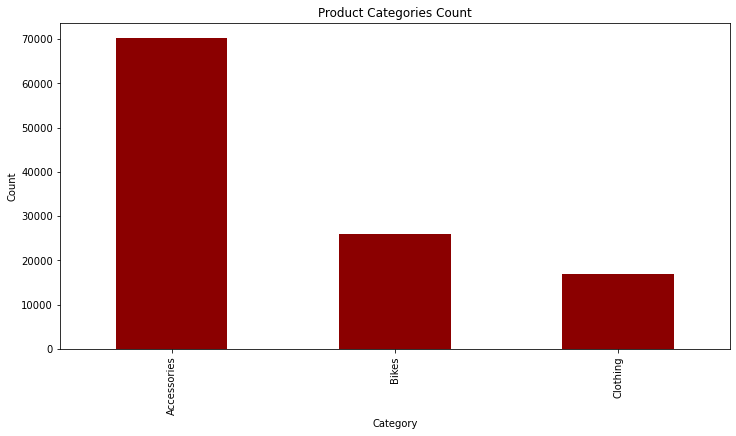

In [10]:
plt.figure(figsize=(12,6))
plt.title('Product Categories Count')
plt.xlabel('Category')
plt.ylabel('Count')
df.Product_Category.value_counts().plot(kind = 'bar', color ='darkred');

In [11]:
df.Product_Category.value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

## B - Gender 

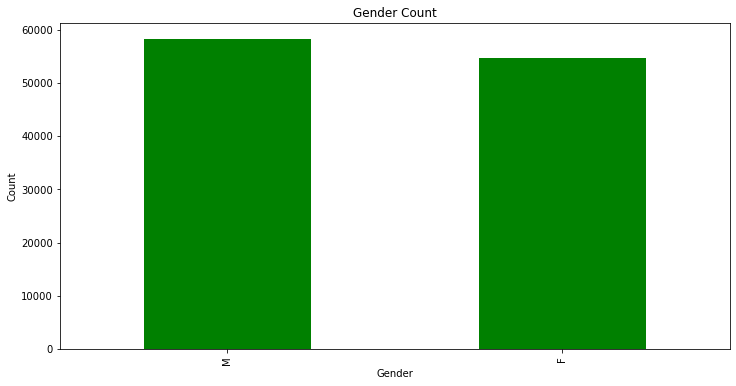

In [12]:
plt.figure(figsize=(12,6))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
df.Customer_Gender.value_counts().plot(kind = 'bar', color = 'g');

In [13]:
display(df.Customer_Gender.value_counts())

M    58312
F    54724
Name: Customer_Gender, dtype: int64

## C - Country

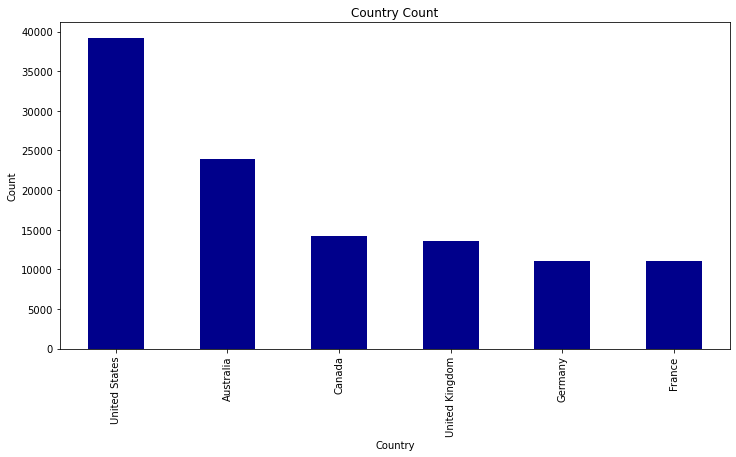

In [14]:
plt.figure(figsize=(12,6))
plt.title('Country Count')
plt.xlabel('Country')
plt.ylabel('Count')
df.Country.value_counts().plot(kind = 'bar', color = 'darkblue');

In [15]:
display(df.Country.value_counts())

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

## D - State

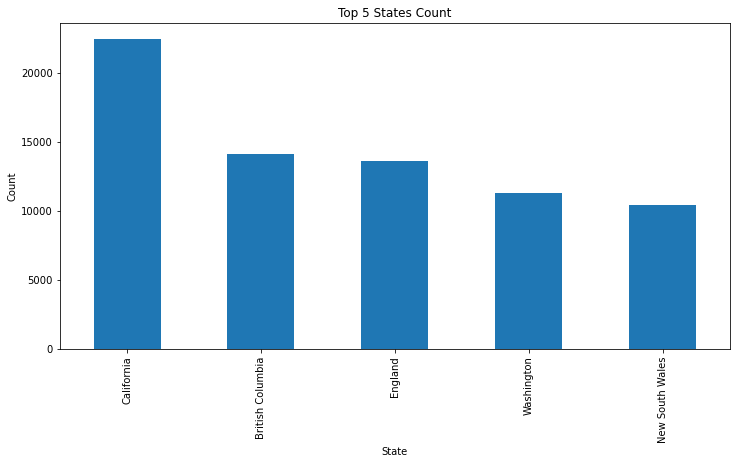

In [16]:
plt.figure(figsize=(12,6))
plt.title('Top 5 States Count')
plt.xlabel('State')
plt.ylabel('Count')
df.State.value_counts().head().plot(kind = 'bar');

In [17]:
df.State.value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Illinois      

## E - Sub Category

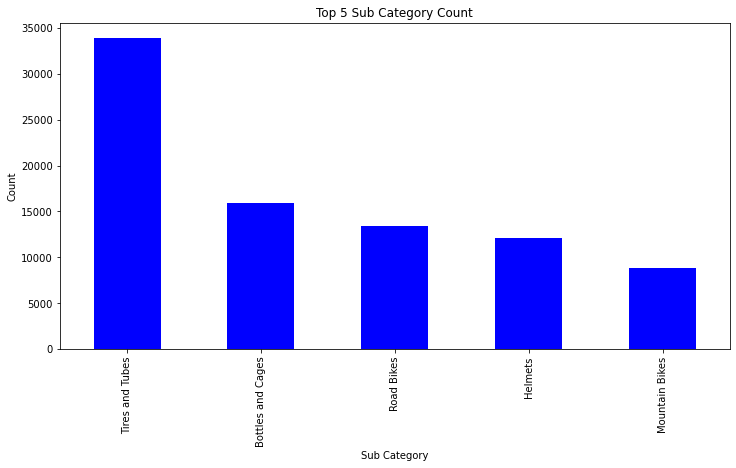

In [18]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Sub Category Count')
plt.xlabel('Sub Category')
plt.ylabel('Count')
df.Sub_Category.value_counts().head().plot(kind = 'bar', color = 'b');

In [19]:
df.Sub_Category.value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

## F - Age Groups

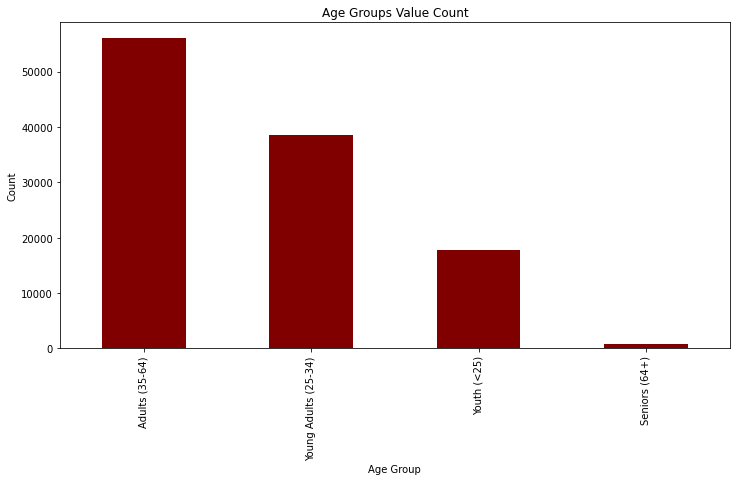

In [20]:
plt.figure(figsize=(12,6))
plt.title('Age Groups Value Count')
plt.xlabel('Age Group')
plt.ylabel('Count')
df.Age_Group.value_counts().plot(kind = 'bar', color = 'maroon');

In [21]:
df.Age_Group.value_counts()

Adults (35-64)          56088
Young Adults (25-34)    38473
Youth (<25)             17750
Seniors (64+)             725
Name: Age_Group, dtype: int64

## G - Products

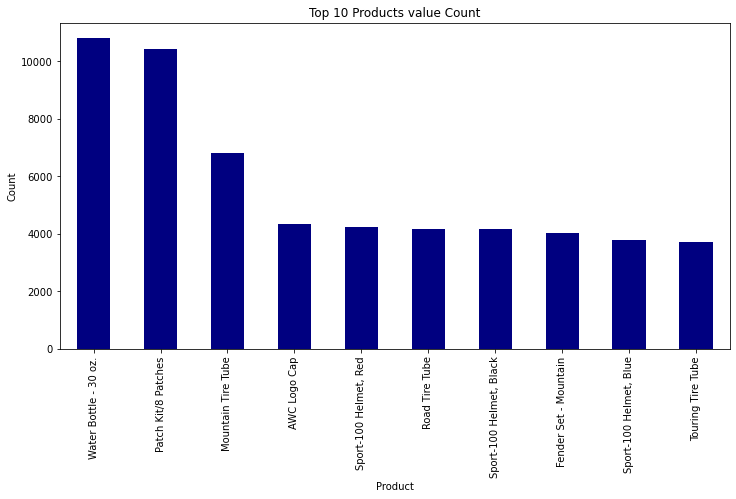

In [22]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Products value Count')
plt.xlabel('Product')
plt.ylabel('Count')
df.Product.value_counts().head(10).plot(kind = 'bar', color = 'navy');

In [23]:
display(df.Product.value_counts())

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Touring-3000 Blue, 50         58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

## H - Most Frequent Months

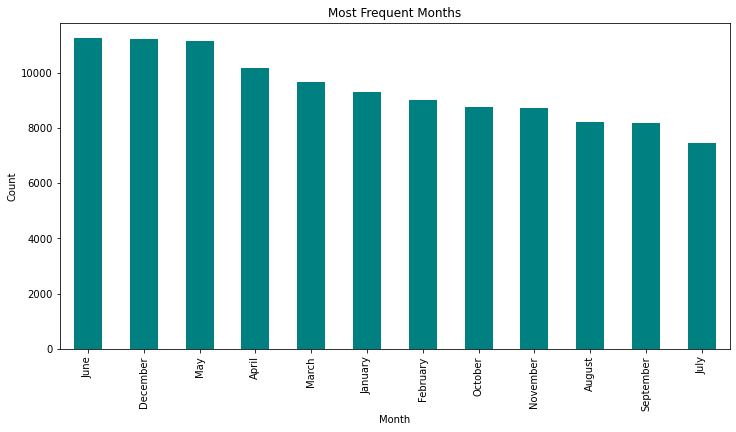

In [24]:
plt.figure(figsize=(12,6))
plt.title('Most Frequent Months')
plt.xlabel('Month')
plt.ylabel('Count')
df.Month.value_counts().plot(kind = 'bar', color = 'teal');

# C - Eploratory Data Analysis

In [25]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
revenue = []
for i in years:
    revenue.append(df[df.Year==i].Revenue.sum())

In [26]:
revenue

[8964888, 9175983, 15240037, 14152724, 20023991, 17713385]

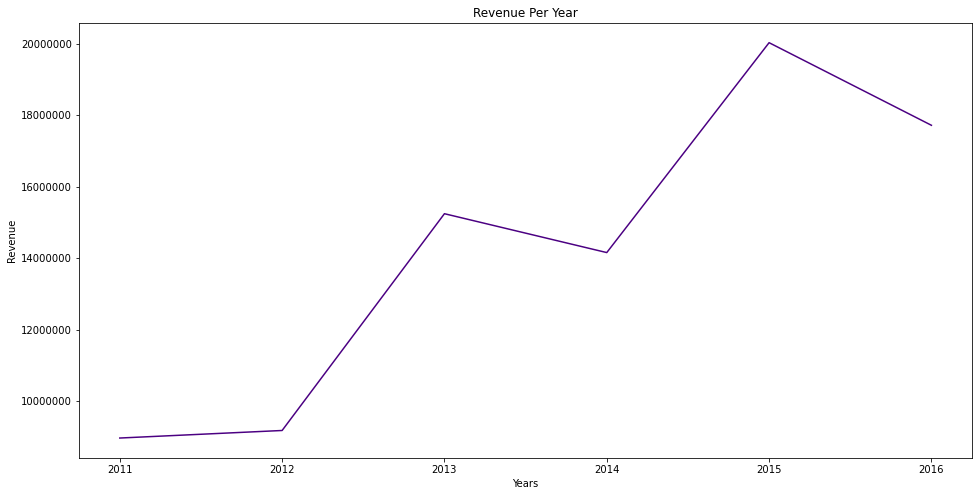

In [32]:
plt.figure(figsize=(16,8))
plt.plot(years,revenue,  color = 'indigo')
plt.title('Revenue Per Year')
plt.ylabel('Revenue')
plt.xlabel('Years')
plt.ticklabel_format(style = 'plain');

(0.0, 1500.0)

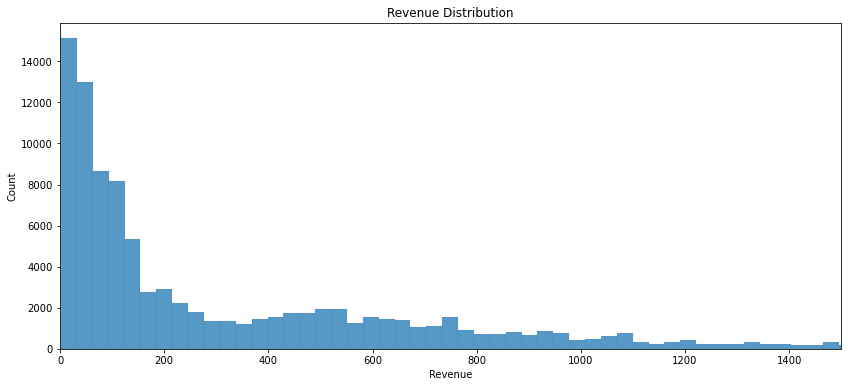

In [33]:
plt.figure(figsize=(14 ,6))
sns.histplot(x=df.Revenue)
plt.title('Revenue Distribution')
plt.xlim(0, 1500);

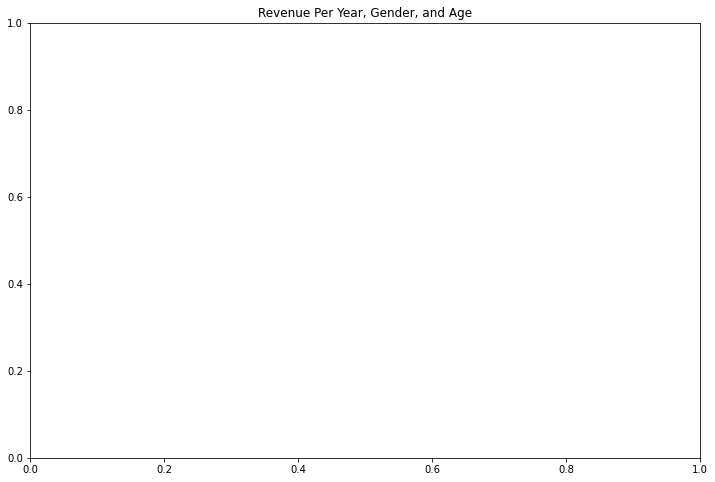

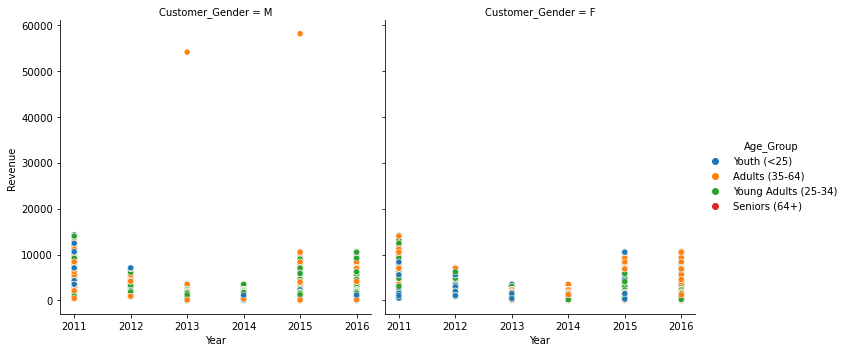

In [34]:
plt.figure(figsize=(12, 8));
plt.title('Revenue Per Year, Gender, and Age')
sns.relplot(x='Year', y='Revenue', col='Customer_Gender', hue='Age_Group', data=df);